# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&units=metric"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kirakira
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | hammerfest
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | borba
Processing Record 9 of Set 1 | aral
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | tazovsky
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | san antonio de pale
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | vorkuta
Processing Record 16 of Set 1 | buenaventura
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | sierra grande
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | saipan
Proc

Processing Record 39 of Set 4 | geraldton
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | muisne
Processing Record 42 of Set 4 | hithadhoo
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | minas de marcona
Processing Record 45 of Set 4 | mount pleasant
Processing Record 46 of Set 4 | keflavik
Processing Record 47 of Set 4 | kuqa
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | north bend
Processing Record 0 of Set 5 | bengkulu
Processing Record 1 of Set 5 | shangri-la
City not found. Skipping...
Processing Record 2 of Set 5 | talnakh
Processing Record 3 of Set 5 | salahonda
Processing Record 4 of Set 5 | east london
Processing Record 5 of Set 5 | wellington
Processing Record 6 of Set 5 | hamilton
Processing Record 7 of Set 5 | cill airne
Processing Record 8 of Set 5 | lazaro cardenas
Processing Record 9 of Set 5 | isafjordur
Processing Record 10 of Set 5 | lompoc
Processing Record 11 of Set 5 | pizarro
Processing

Processing Record 33 of Set 8 | celestun
Processing Record 34 of Set 8 | saudarkrokur
Processing Record 35 of Set 8 | perambalur
Processing Record 36 of Set 8 | bel ombre
Processing Record 37 of Set 8 | bushland beach
City not found. Skipping...
Processing Record 38 of Set 8 | shirvan
Processing Record 39 of Set 8 | rio grande
Processing Record 40 of Set 8 | pierre
Processing Record 41 of Set 8 | tiruppuvanam
Processing Record 42 of Set 8 | nahiyat ash shinafiyah
Processing Record 43 of Set 8 | palmer
Processing Record 44 of Set 8 | ketchikan
Processing Record 45 of Set 8 | anibare
City not found. Skipping...
Processing Record 46 of Set 8 | sakaiminato
Processing Record 47 of Set 8 | mukah
City not found. Skipping...
Processing Record 48 of Set 8 | hagere selam
Processing Record 49 of Set 8 | hermansverk
Processing Record 0 of Set 9 | barreiras
Processing Record 1 of Set 9 | hailar
Processing Record 2 of Set 9 | morinville
Processing Record 3 of Set 9 | demba
Processing Record 4 of Set

Processing Record 16 of Set 12 | taupo
Processing Record 17 of Set 12 | ulsteinvik
Processing Record 18 of Set 12 | al wajh
Processing Record 19 of Set 12 | hami
Processing Record 20 of Set 12 | villa gesell
Processing Record 21 of Set 12 | cadale
Processing Record 22 of Set 12 | mhamid
Processing Record 23 of Set 12 | villa canas
Processing Record 24 of Set 12 | es castell
Processing Record 25 of Set 12 | chibougamau
Processing Record 26 of Set 12 | chui
Processing Record 27 of Set 12 | rio san juan
Processing Record 28 of Set 12 | gazipasa
Processing Record 29 of Set 12 | port saint john's
Processing Record 30 of Set 12 | chicxulub puerto
City not found. Skipping...
Processing Record 31 of Set 12 | sao joao da barra
Processing Record 32 of Set 12 | jinka
Processing Record 33 of Set 12 | weno
Processing Record 34 of Set 12 | camana
Processing Record 35 of Set 12 | taksimo
Processing Record 36 of Set 12 | katsuura
Processing Record 37 of Set 12 | san juan bautista
Processing Record 38 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kirakira,-10.4544,161.9205,24.86,95,100,2.00,SB,1699380539
1,adamstown,-25.0660,-130.1015,22.44,85,100,9.17,PN,1699380539
2,ushuaia,-54.8000,-68.3000,7.81,54,75,11.18,AR,1699380351
3,hammerfest,70.6634,23.6821,1.25,93,75,2.06,NO,1699380383
4,port-aux-francais,-49.3500,70.2167,3.50,76,76,10.51,TF,1699380540


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("wp_output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("wp_output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kirakira,-10.4544,161.9205,24.86,95,100,2.00,SB,1699380539
1,adamstown,-25.0660,-130.1015,22.44,85,100,9.17,PN,1699380539
2,ushuaia,-54.8000,-68.3000,7.81,54,75,11.18,AR,1699380351
3,hammerfest,70.6634,23.6821,1.25,93,75,2.06,NO,1699380383
4,port-aux-francais,-49.3500,70.2167,3.50,76,76,10.51,TF,1699380540


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

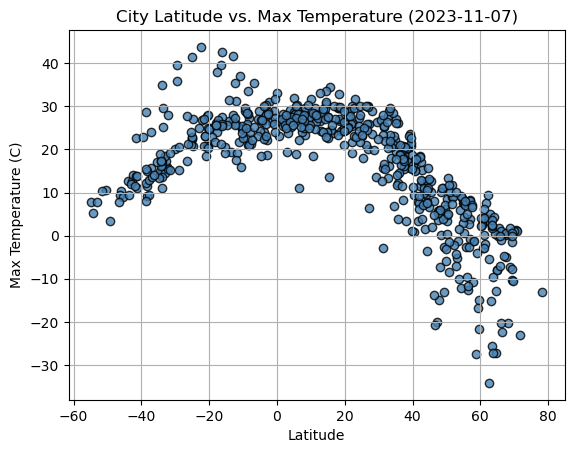

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="steelblue", edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("wp_output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

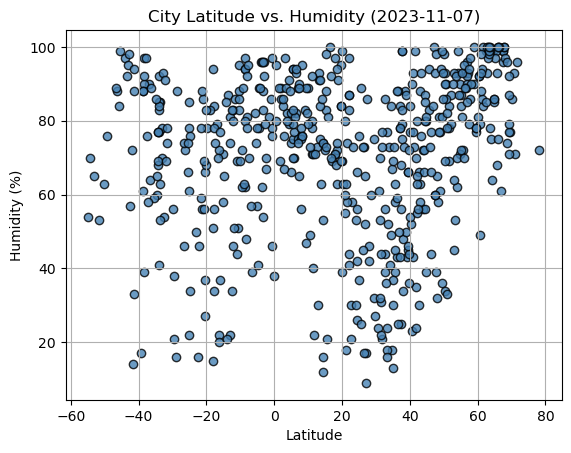

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="steelblue", edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("wp_output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

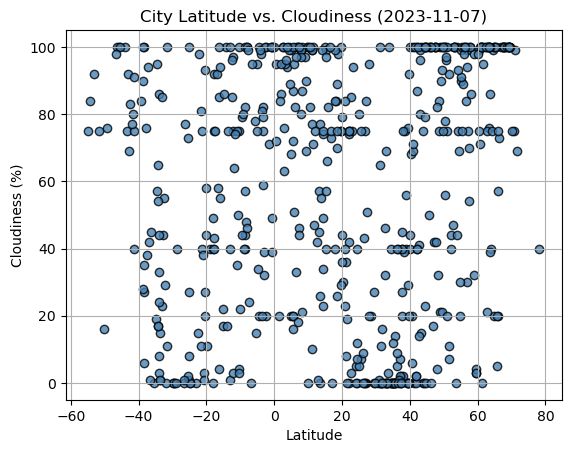

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="steelblue", edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("wp_output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

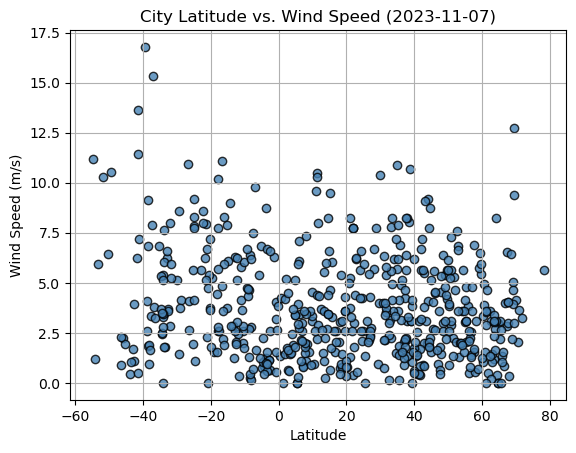

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="steelblue", edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("wp_output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_reg(x_values, y_values, annot_x, annot_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, color = "steelblue")
    plt.plot(x_values, regress_values, color = "red")
    
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    
    plt.annotate(line_eq, (annot_x, annot_y), fontsize = 15, color = "red")
   
    return(f"The r-value is: {rvalue**2}")
    
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hammerfest,70.6634,23.6821,1.25,93,75,2.06,NO,1699380383
5,longyearbyen,78.2186,15.6401,-13.09,72,40,5.66,SJ,1699380424
8,aral,40.5156,81.2636,9.45,23,6,1.33,CN,1699380417
9,petropavlovsk-kamchatsky,53.0452,158.6483,-5.12,45,100,6.83,RU,1699380541
10,tazovsky,67.4667,78.7000,-4.86,96,100,6.55,RU,1699380542


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kirakira,-10.4544,161.9205,24.86,95,100,2.00,SB,1699380539
1,adamstown,-25.0660,-130.1015,22.44,85,100,9.17,PN,1699380539
2,ushuaia,-54.8000,-68.3000,7.81,54,75,11.18,AR,1699380351
4,port-aux-francais,-49.3500,70.2167,3.50,76,76,10.51,TF,1699380540
6,afaahiti,-17.7500,-149.2833,25.93,84,92,10.17,PF,1699380540


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7005477806096514


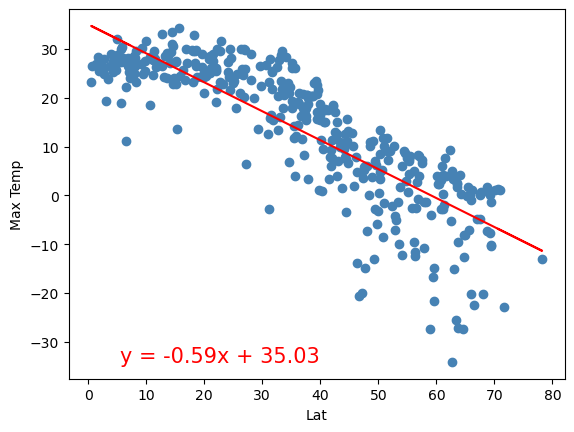

In [16]:
# Linear regression on Northern Hemisphere
print(linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], northern_hemi_df["Lat"].min()+5,
                 northern_hemi_df["Max Temp"].min()))

The r-value is: 0.43577545433452053


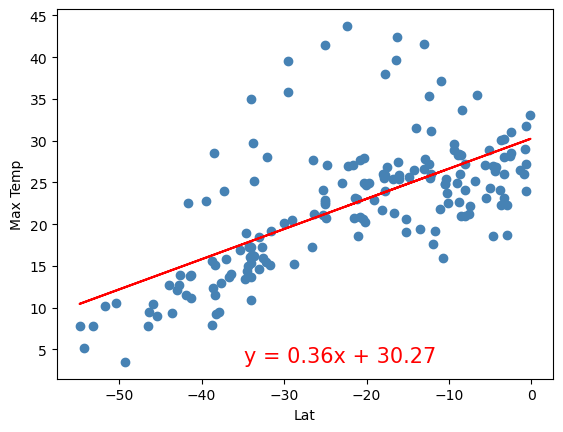

In [17]:
# Linear regression on Southern Hemisphere
print(linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], southern_hemi_df["Lat"].min()+20,
                 southern_hemi_df["Max Temp"].min()))

**Discussion about the linear relationship:** In the graph of the northern hemisphere's latitude versus max temperature, we can see that is has a strong negative correlation with an r-value of 0.70. As latitude increases, max temperature decreases. The slope is -0.59 meaning that for every 1 degree increase  in latitude, max temperature is expected to drop -0.59 dgrees. However, we see the opposite in the southern hemisphere with a positive correlation. The correlation in this hemisphere is only a moderate correlation becuase the r-value is only 0.44. The slope of 0.36 suggests that for every 1 degree increase in latitude, there will be a 0.36 degree increase in max temperature. These two linear relationships, when put together, result in a concave down graph rather than one long line or linear relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04332229174283452


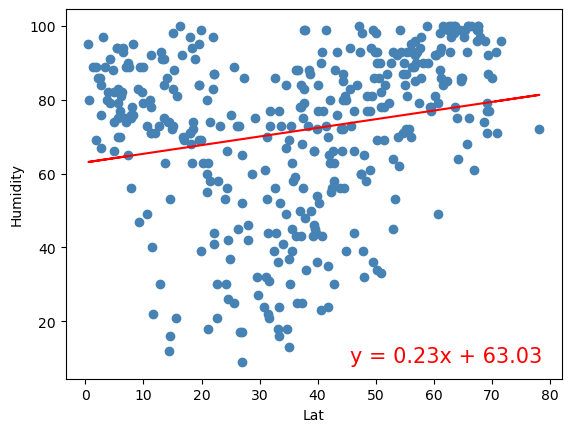

In [18]:
# Northern Hemisphere
print(linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], northern_hemi_df["Lat"].min()+45,
                 northern_hemi_df["Humidity"].min()))

The r-value is: 0.0001734353625704103


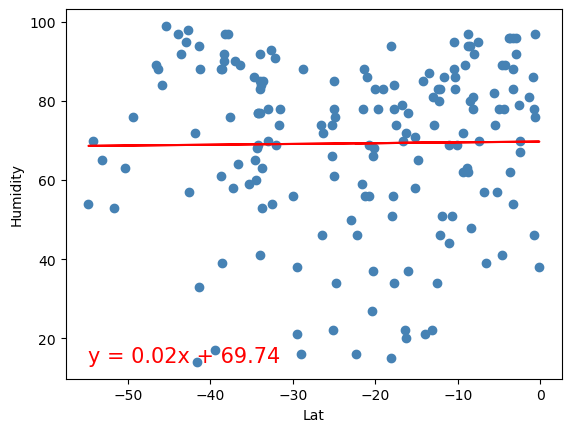

In [19]:
# Southern Hemisphere
print(linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], southern_hemi_df["Lat"].min(),
                 southern_hemi_df["Humidity"].min()))

**Discussion about the linear relationship:** The graph for the northern hemisphere, unlike its relationship between latitude and max temperature, has a positive correlation between latitude and humidity. Though it is weak with an r-value of only 0.04. With a slop of 0.23, you'd expect humidity to increase by 0.23% for each 1 degree increase in latitude. The linear relationshp between latitude and humidity is even weaker in the southern hemisphere and it appears to be only slightly positive. The r-value for the southern hemisphere's linear relationship is only 0.0001. It's extremely weak and the slope suggests that, in this hemisphere, we'd only expect a decrease in humidity of 0.02% for every 1 degree increase in latitude. This is correlation could just be much weaker correlation in the southern hemisphere but it's also possible that there is a skew to the data sample we took.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.015628926791730002


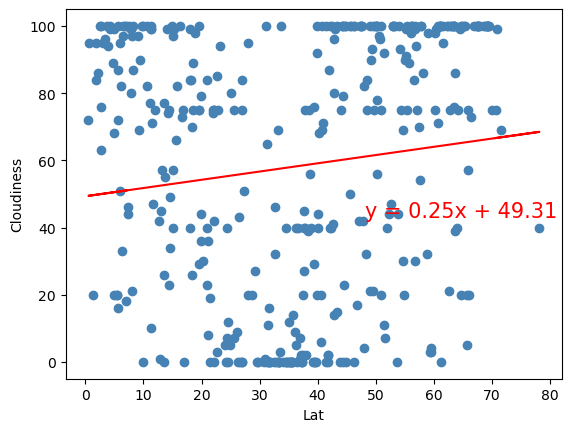

In [20]:
# Northern Hemisphere
print(linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], northern_hemi_df["Lat"].max()-30,
                 northern_hemi_df["Cloudiness"].min()+43))

The r-value is: 0.004800172647349832


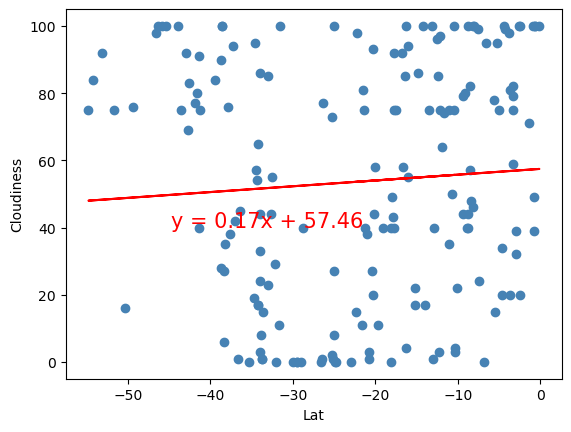

In [21]:
# Southern Hemisphere
print(linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], southern_hemi_df["Lat"].min()+10,
                 southern_hemi_df["Cloudiness"].min()+40))

**Discussion about the linear relationship:** We have another weak positive correlation for the northern hemisphere, this time for latitude vs. Cloudiness. The r-value this time is a mere 0.016 meaning it is quite weak. The slope for latitude versus cloudiness in the northern hemisphere is 0.25 - for every 1 degree increase in latitude, we expect an increase of 0.25 in cloudiness. The positive correlation between the southern hemisphere's latitude and cloudiness is slightly weaker with an r-value of only about 0.005. The slope for this grpah is 0.17 meaning that every 1 degree increase in latitude in the southern hemisphere is expected to cause an increase of 0.17 in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 7.473700030602312e-05


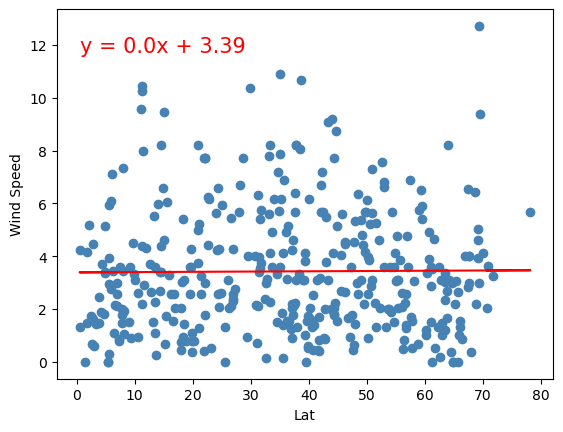

In [22]:
# Northern Hemisphere
print(linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], northern_hemi_df["Lat"].min(),
                 northern_hemi_df["Wind Speed"].max()-1))

The r-value is: 0.052979098753143085


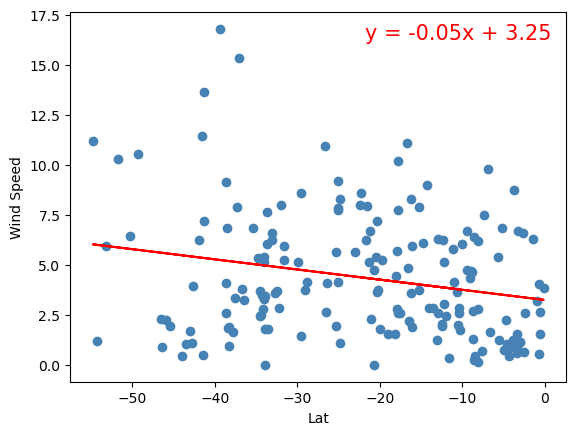

In [23]:
# Southern Hemisphere
print(linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], southern_hemi_df["Lat"].min()+33,
                 southern_hemi_df["Wind Speed"].max()-0.5))

**Discussion about the linear relationship:** For our final set and linear relationships, we see the weakest correlation we've seen so far. The northern hemisphere has a very very weak positive correlation between latitude and windiness. the r-value for this linear relationship is only about 7.5e^-5 or 0.000075. The slope in our linear equation is 0 though it is rounded so for every 1 degree increase in latitude, we'd see a very very small increase in windiness. However, for the first time, we're seeing a negative correlation for the southern hemisphere, though it is a bit stronger than the correlation we see in the northern hemisphere. The r-value for the southern hemisphere's latitude versus windiness is only about 0.053. The slope is -0.05 - for every 1 degree increase in latitude, you'd expect to see a decrease of 0.05m/s in windiness. These two graphs, similar to the first graphs between northern and southern hemisphere (latitude vs. max temperature) would form a slightly concave line when put together, though this time it would be concave up and the shape of the curve would be much weaker and less distinct than the one we see with latitude vs. max temperature.